# Library

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

Data yang digunakan adalah dataset Goodreads-books yang bersumber dari Kaggle (https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks/data?select=books.csv)

In [53]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data with the appropriate delimiter, using the python engine and skipping bad lines
data = pd.read_csv('/content/drive/MyDrive/DBS/Data/books.csv', delimiter=',', engine='python', on_bad_lines='skip')

# Set 'bookID' as the index
data.set_index('bookID', inplace=True)

# Display the first few rows to check
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# Explaratory Data Analysis - Deskripsi Peubah

Berdasarkan informasi dari Kaggle, peubah-peubah pada dataset adalah sebagai berikut:

- Title: Nama buku yang terdaftar di platform Goodreads (peubah kategorikal)
- Author: Nama penulis buku (peubah kategorika)
- Average rating: Rata-rata rating yang diberikan pengguna untuk buku tersebut di Goodreads (peubah kontinu)
- ISBN: Nomor ISBN buku yang digunakan untuk identifikasi unik (peubah kategorikal)
- ISBN13: Nomor ISBN-13 buku, versi terbaru dari ISBN (peubah kategorikal)
- Language Code: Kode bahasa buku, misalnya "eng" untuk Bahasa Inggris (peubah kategorikal)
- Num Pages: Jumlah halaman dalam buku (peubah kontinu)
- Ratings Count: Jumlah total rating yang diterima oleh buku (peubah kontinu)
Text Review Count: Jumlah ulasan teks yang ditulis oleh pengguna (peubah kontinu)
- Publication Date: Tanggal penerbitan buku (peubah kategorikal)
- Publisher: Nama penerbit buku (peubah kategorikal)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11119 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11119 non-null  object 
 1   authors             11119 non-null  object 
 2   average_rating      11119 non-null  float64
 3   isbn                11119 non-null  object 
 4   isbn13              11119 non-null  int64  
 5   language_code       11119 non-null  object 
 6     num_pages         11119 non-null  int64  
 7   ratings_count       11119 non-null  int64  
 8   text_reviews_count  11119 non-null  int64  
 9   publication_date    11119 non-null  object 
 10  publisher           11119 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [55]:
data.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11119.000000,1.111900e+04,11119.000000,1.111900e+04,11119.000000
mean,3.934135,9.759873e+12,336.439788,1.794832e+04,542.167371
std,0.350384,4.430554e+11,241.177969,1.125190e+05,2577.069549
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,47.000000
75%,4.135000,9.780873e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [56]:
data.shape

(11119, 11)

Dataset terdiri dari 11119 baris data dan 11 kolom.

# Univariate Exploratory Data Analysis

## Peubah Title

In [57]:
data['title'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
11119 non-null  object
dtypes: object(1)
memory usage: 173.7+ KB


In [58]:
print('Banyak data: ', len(data['title'].unique()))

Banyak data:  10344


In [59]:
print('Judul Buku: ', data['title'].unique())

Judul Buku:  ['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']


Terdapat 10.344 judul buku berbeda

## Peubah Authors

In [60]:
data['authors'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: authors
Non-Null Count  Dtype 
--------------  ----- 
11119 non-null  object
dtypes: object(1)
memory usage: 173.7+ KB


In [61]:
print('Banyak data: ', len(data['authors'].unique()))

Banyak data:  6635


In [62]:
print('Authors: ', data['authors'].unique())

Authors:  ['J.K. Rowling/Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'C.S. Lewis/Ana Falcão Bastos'
 'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos'
 'William T. Vollmann/Larry McCaffery/Michael Hemmingson']


Terdapat 6.635 authors berbeda.

## Peubah Average Rating

In [63]:
data['average_rating'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: average_rating
Non-Null Count  Dtype  
--------------  -----  
11119 non-null  float64
dtypes: float64(1)
memory usage: 173.7 KB


In [64]:
data['average_rating'].describe()

,average_rating
count,11119.000000
mean,3.934135
std,0.350384
min,0.000000
25%,3.770000
50%,3.960000
75%,4.135000
max,5.000000


Dapat dilihat bahwa nilai maksimum average rating adalah 5 dan nilai minimumnya adalah 0, dengan rata-ratanya sebesar 3,93

## Peubah Language Code

In [65]:
data['language_code'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: language_code
Non-Null Count  Dtype 
--------------  ----- 
11119 non-null  object
dtypes: object(1)
memory usage: 173.7+ KB


In [66]:
print('Banyak Bahasa: ', len(data['language_code'].unique()))

Banyak Bahasa:  27


In [67]:
print('Language: ', data['language_code'].unique())

Language:  ['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']


Terdapat 27 jenis bahasa.

## Peubah Num Pages

In [68]:
data['  num_pages'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name:   num_pages
Non-Null Count  Dtype
--------------  -----
11119 non-null  int64
dtypes: int64(1)
memory usage: 173.7 KB


In [69]:
data['  num_pages'].describe()

,num_pages
count,11119.000000
mean,336.439788
std,241.177969
min,0.000000
25%,192.000000
50%,299.000000
75%,416.000000
max,6576.000000


Dapat dilihat halaman maksimal buku adlaah 6576 dan minimumnya adalah 0, dengan rata-rata 336 halaman

## Peubah Ratings Count

In [70]:
data['ratings_count'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: ratings_count
Non-Null Count  Dtype
--------------  -----
11119 non-null  int64
dtypes: int64(1)
memory usage: 173.7 KB


In [71]:
data['ratings_count'].describe()

,ratings_count
count,1.111900e+04
mean,1.794832e+04
std,1.125190e+05
min,0.000000e+00
25%,1.040000e+02
50%,7.450000e+02
75%,5.000500e+03
max,4.597666e+06


Dapat dilihat bahwa ratings count maksimumnya adalah 4,597 dan minimumnya adalah 0.

## Peubah teks reviews count

In [72]:
data['text_reviews_count'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: text_reviews_count
Non-Null Count  Dtype
--------------  -----
11119 non-null  int64
dtypes: int64(1)
memory usage: 173.7 KB


In [73]:
data['text_reviews_count'].describe()

,text_reviews_count
count,11119.000000
mean,542.167371
std,2577.069549
min,0.000000
25%,9.000000
50%,47.000000
75%,238.000000
max,94265.000000


Dapat dilihat bahwa text reviews countnya maksimum sebanyak 94.265 dan paling minimum 0.

## Peubah Publication Date

### Mengonversi Peubah Publication Date ke tipe Datetime

In [74]:
data['publication_date'] = pd.to_datetime(data['publication_date'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11119 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11119 non-null  object        
 1   authors             11119 non-null  object        
 2   average_rating      11119 non-null  float64       
 3   isbn                11119 non-null  object        
 4   isbn13              11119 non-null  int64         
 5   language_code       11119 non-null  object        
 6     num_pages         11119 non-null  int64         
 7   ratings_count       11119 non-null  int64         
 8   text_reviews_count  11119 non-null  int64         
 9   publication_date    11117 non-null  datetime64[ns]
 10  publisher           11119 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.0+ MB


In [75]:
data['publication_date'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: publication_date
Non-Null Count  Dtype         
--------------  -----         
11117 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 173.7 KB


In [76]:
data['publication_date'].describe()

,publication_date
count,11117
mean,2000-08-29 17:35:48.601241472
min,1900-01-01 00:00:00
25%,1998-07-21 00:00:00
50%,2003-03-01 00:00:00
75%,2005-10-01 00:00:00
max,2020-03-31 00:00:00


Dapat dilihat bahwa buku dengan publication date terlama adalah pada tanggal 1 Januari 1900 dan yang terbaru adalah 31 Maret 2020.

## Peubah Publisher

In [77]:
data['publisher'].info()

<class 'pandas.core.series.Series'>
Index: 11119 entries, 1 to 45641
Series name: publisher
Non-Null Count  Dtype 
--------------  ----- 
11119 non-null  object
dtypes: object(1)
memory usage: 173.7+ KB


In [78]:
print('Publisher: ', len(data['publisher'].unique()))

Publisher:  2289


Terdapat sebanyak 2289 publisher.

# Visualisasi

### Visualisasi Peubah Title

<ipython-input-79-1344046237>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


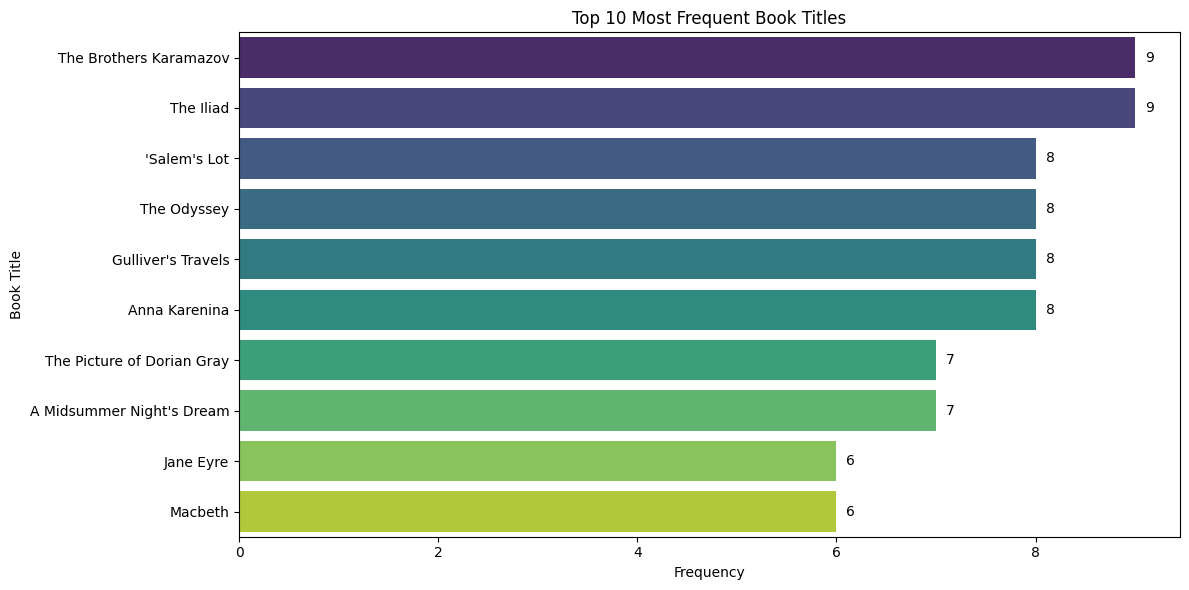

In [79]:
top_titles = data['title'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')

for i, v in enumerate(top_titles.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.title('Top 10 Most Frequent Book Titles')
plt.xlabel('Frequency')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

Barchart ini menunjukkan 10 judul buku yang paling sering ditemukan dalam dataset. Judul buku yang paling sering muncul adalah The Brothers Karamazov dan The Iliad, masing-masing dengan frekuensi 9 kali. Diikuti oleh beberapa judul lain seperti 'Salem's Lot dan The Odyssey yang muncul sebanyak 8 kali. Barchart ini menggambarkan popularitas berbagai buku dalam koleksi data yang digunakan.

### Visualisasi Peubah Authors

<ipython-input-80-1345054590>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


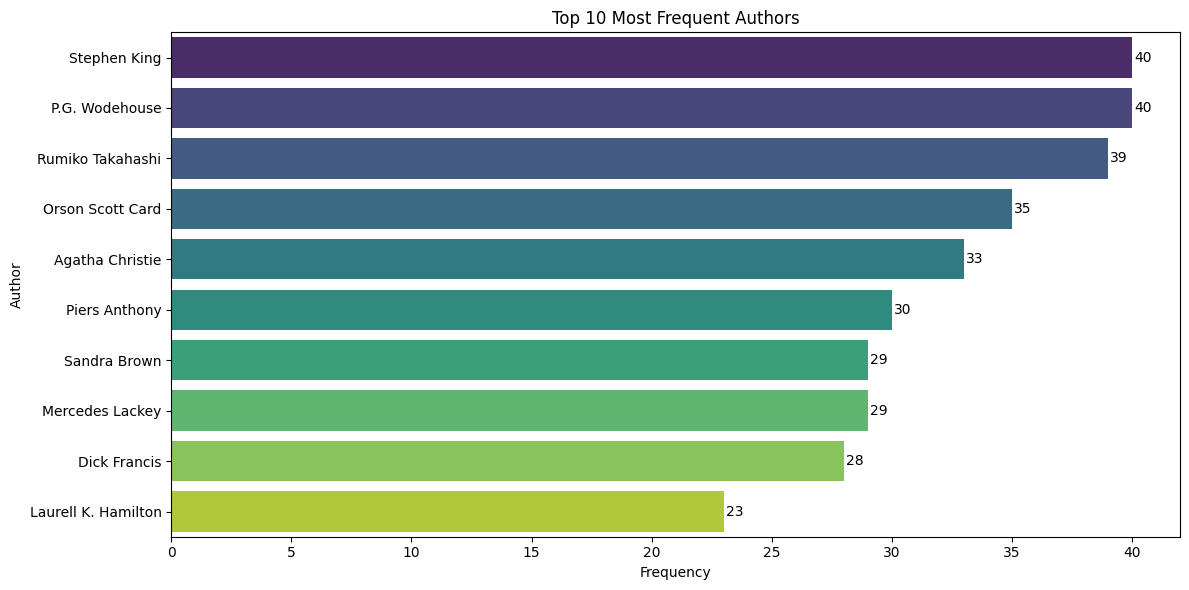

In [80]:
top_authors = data['authors'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')

for i, v in enumerate(top_authors.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Frequency')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

Barchart di atas menampilkan 10 penulis yang paling sering muncul dalam dataset. Penulis yang paling sering ditemukan adalah Stephen King dan P.G. Wodehouse, masing-masing dengan 40 kali kemunculan. Penulis lainnya seperti Rumiko Takahashi dan Orson Scott Card juga sering muncul dalam dataset, dengan frekuensi 39 dan 35, masing-masing. Barchart ini menggambarkan dominasi penulis tertentu dalam koleksi buku yang dianalisis.

### Visualisasi Peubah Average Rating

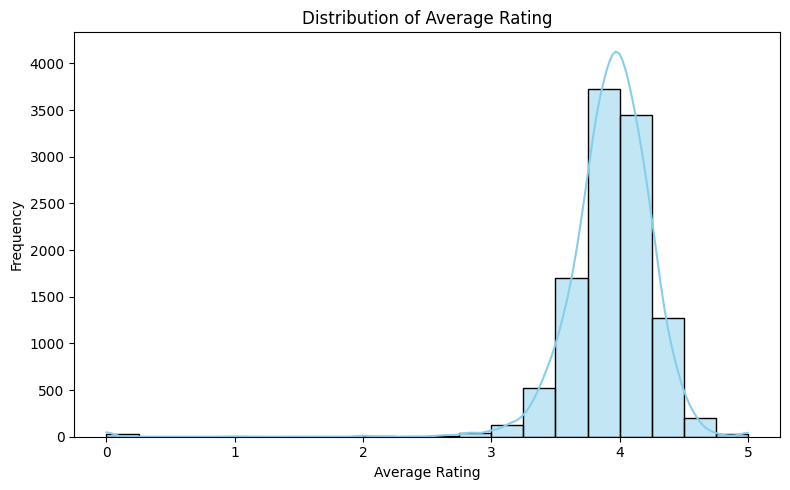

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(data['average_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi rating rata-rata dari buku-buku dalam dataset. Sebagian besar buku memiliki rating antara 3 hingga 4, dengan frekuensi tertinggi di sekitar 4. Hal ini menunjukkan bahwa sebagian besar buku mendapatkan penilaian yang baik. Namun, ada juga buku dengan rating yang lebih rendah, meskipun jumlahnya lebih sedikit.

### Visualisasi Peubah Language Code

<ipython-input-82-369967459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['language_code'], order=data['language_code'].value_counts().index, palette='plasma')


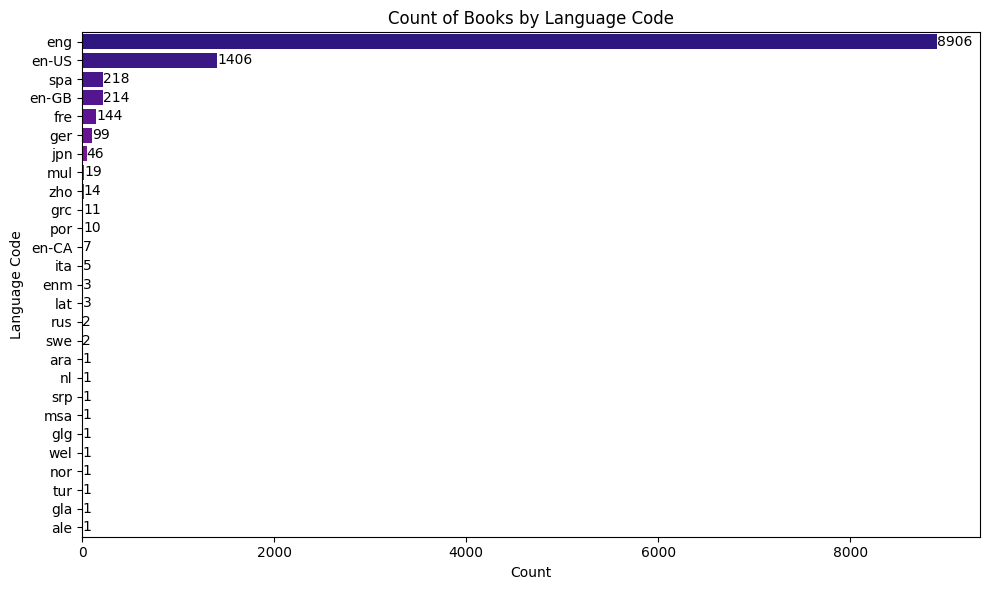

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data['language_code'], order=data['language_code'].value_counts().index, palette='plasma')

for i, v in enumerate(data['language_code'].value_counts().values):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.title('Count of Books by Language Code')
plt.xlabel('Count')
plt.ylabel('Language Code')
plt.tight_layout()
plt.show()

Grafik ini menggambarkan jumlah buku berdasarkan kode bahasa yang terdaftar dalam dataset. Buku dalam bahasa Inggris (kode bahasa eng) mendominasi dengan jumlah yang sangat tinggi, yaitu 8906 buku. Bahasa lainnya seperti Spanyol (spa) dan Inggris (kode en-US dan en-GB) juga memiliki jumlah yang cukup signifikan, meskipun jauh lebih sedikit dibandingkan bahasa Inggris.

### Visualisasi Peubah Num Pages

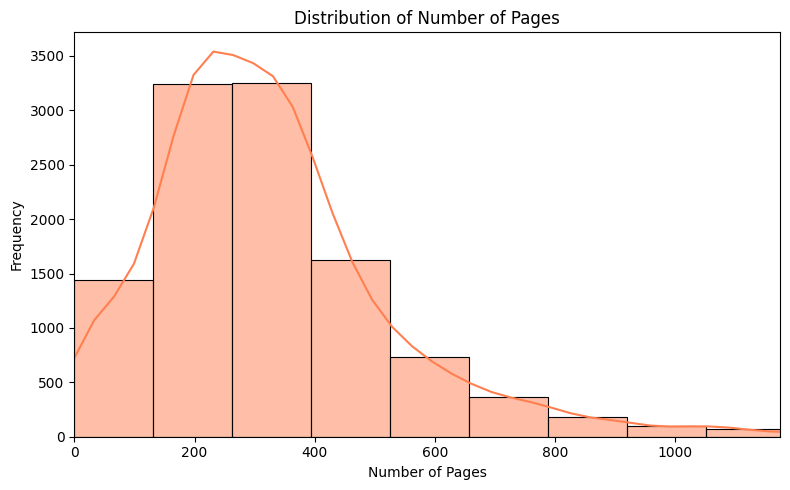

In [83]:
plt.figure(figsize=(8, 5))
sns.histplot(data['  num_pages'], bins=50, kde=True, color='coral')
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.xlim(0, data['  num_pages'].quantile(0.99)) # Batasi x-axis untuk melihat distribusi yang lebih jelas
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi jumlah halaman buku. Sebagian besar buku memiliki jumlah halaman antara 100 hingga 400 halaman, dengan puncaknya pada sekitar 200 halaman. Buku dengan jumlah halaman lebih sedikit atau lebih banyak sangat jarang ditemukan.

### Visualisasi Peubah Rating Count

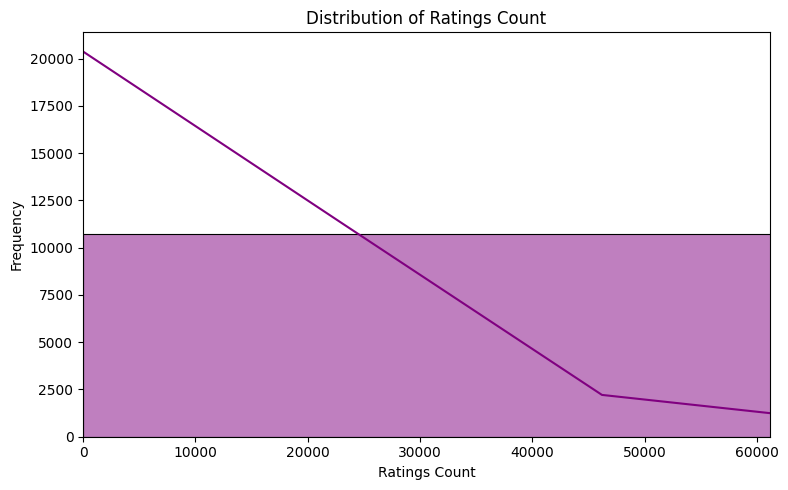

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(data['ratings_count'], bins=50, kde=True, color='purple')
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.xlim(0, data['ratings_count'].quantile(0.95)) # Batasi x-axis
plt.tight_layout()
plt.show()

Grafik ini menggambarkan distribusi jumlah rating yang diterima oleh buku. Kebanyakan buku memiliki jumlah rating yang rendah, dengan sedikit buku yang memiliki ribuan rating. Ini menunjukkan bahwa sebagian besar buku hanya menerima sedikit ulasan atau rating dari pembaca.

### Visualisasi Peubah Text Review Count

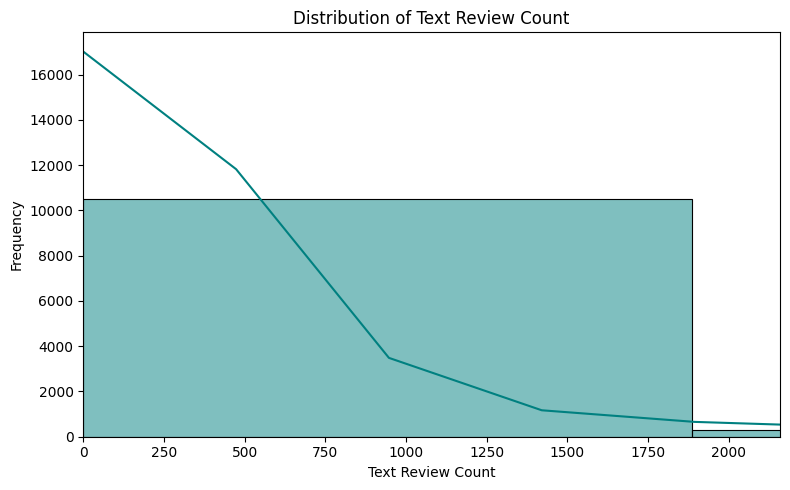

In [85]:
plt.figure(figsize=(8, 5))
sns.histplot(data['text_reviews_count'], bins=50, kde=True, color='teal')
plt.title('Distribution of Text Review Count')
plt.xlabel('Text Review Count')
plt.ylabel('Frequency')
plt.xlim(0, data['text_reviews_count'].quantile(0.95)) # Batasi x-axis
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi jumlah ulasan teks untuk buku-buku dalam dataset. Sebagian besar buku memiliki ulasan teks yang sedikit, dengan jumlah ulasan yang lebih tinggi secara signifikan pada beberapa buku yang lebih populer. Hal ini mencerminkan bahwa buku dengan ulasan teks lebih banyak cenderung lebih dikenal atau lebih banyak dibaca.

### Visualisasi Peubah Publication Date

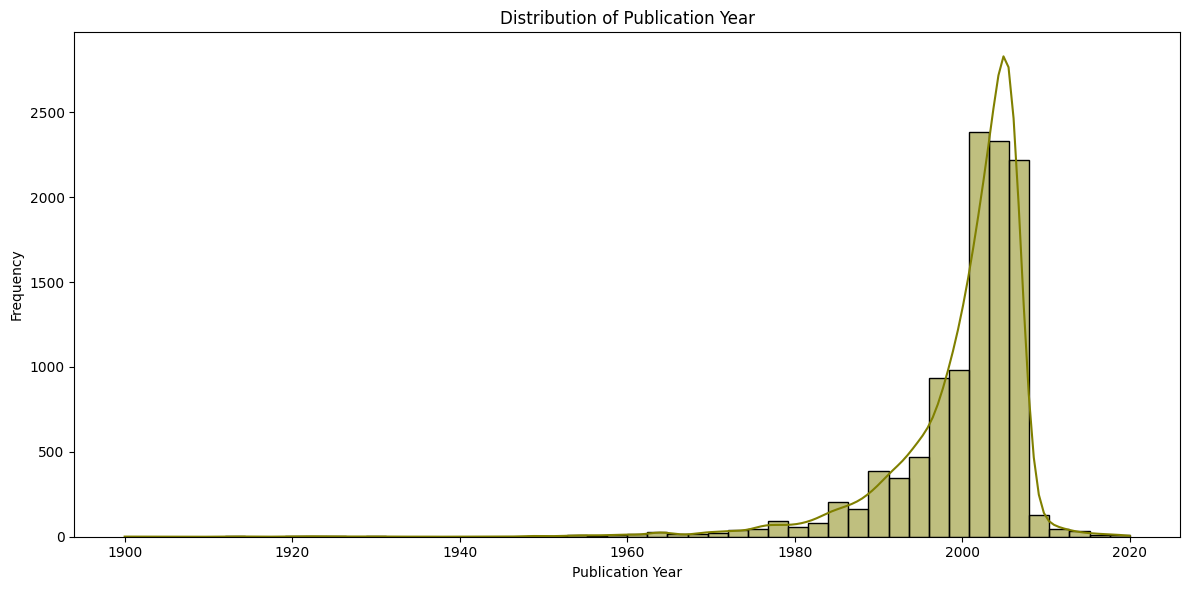

In [86]:
data['publication_year'] = pd.to_datetime(data['publication_date'], errors='coerce').dt.year
plt.figure(figsize=(12, 6))
sns.histplot(data['publication_year'].dropna(), bins=50, kde=True, color='olive')
plt.title('Distribution of Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi tahun publikasi buku. Sebagian besar buku diterbitkan antara tahun 2000 hingga 2020, dengan puncaknya terjadi pada tahun 2000. Hal ini menunjukkan bahwa dataset ini didominasi oleh buku-buku yang diterbitkan pada abad ke-21.

### Visualisasi Peubah Publisher

<ipython-input-87-749024231>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


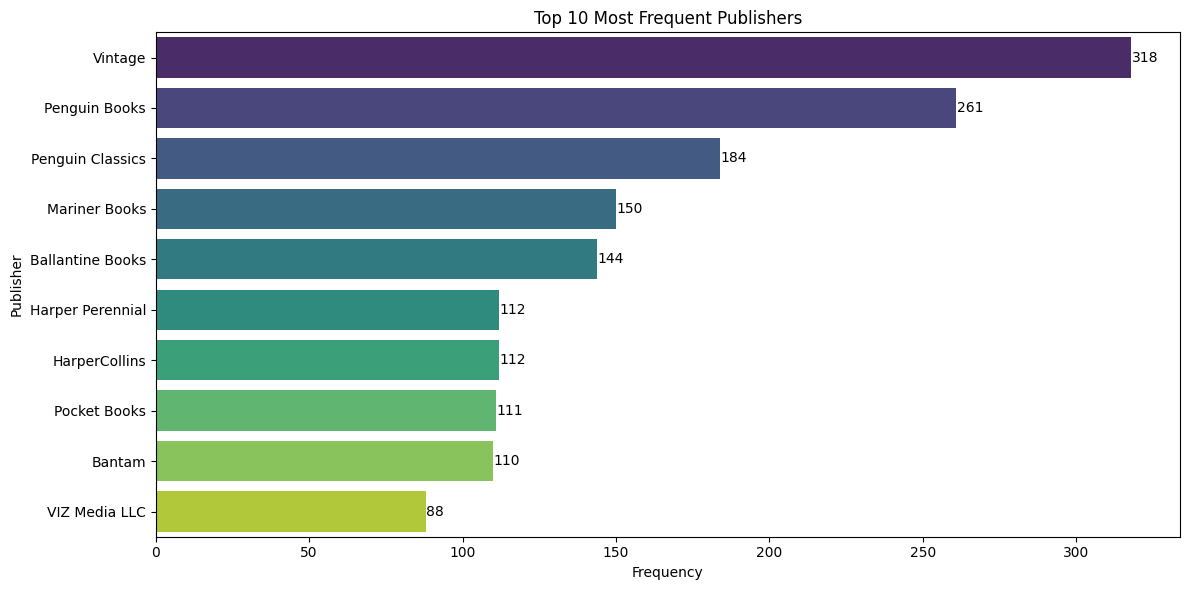

In [87]:
top_publishers = data['publisher'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')

for i, v in enumerate(top_publishers.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.title('Top 10 Most Frequent Publishers')
plt.xlabel('Frequency')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

Barchart di atas menampilkan 10 penerbit buku yang paling sering muncul dalam dataset. Penerbit yang paling sering ditemukan adalah Vintage dengan 318 buku, diikuti oleh Penguin Books dan Penguin Classics. Barchart ini menunjukkan penerbit-penerbit besar yang memiliki kontribusi signifikan terhadap koleksi buku yang dianalisis.

# Data Preparation

## Menyiapkan Data untuk Analisis Rekomendasi

Peubah yang diambil adalah peubah title, authors, language code, dan publisher yang relevan dan merepresentasikan isi dan karakteristik buku.

In [88]:
# Menyiapkan Data untuk Analisis Rekomendasi
df = pd.DataFrame({
    'book_title': data['title'].tolist(),
    'book_author': data['authors'].tolist(),
    'language_code': data['language_code'].tolist(),
    'publisher': data['publisher'].tolist()
})

## Mengecek Missing Value

In [89]:
pd.DataFrame({'Nilai yang Kosong':df.isna().sum()})

,Nilai yang Kosong
book_title,0
book_author,0
language_code,0
publisher,0


Pada dataset tidak terdapat missing values.

## Mengecek Duplikasi Data

In [90]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")
print(duplicate_rows.head())

Jumlah baris duplikat: 46
                                             book_title     book_author  \
179                                   Gravity's Rainbow  Thomas Pynchon   
838                                The Crying of Lot 49  Thomas Pynchon   
1009  The Curious Incident of the Dog in the Night-Time     Mark Haddon   
1161               A Short History of Nearly Everything     Bill Bryson   
1742                           Cry  the Beloved Country      Alan Paton   

     language_code         publisher  
179            eng     Penguin Books  
838            eng  Harper Perennial  
1009           eng           Vintage  
1161           eng    Broadway Books  
1742           eng          Scribner  


Karena terdapat duplikasi data maka dihapus

In [91]:
df.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
df.head()

Jumlah baris setelah menghapus duplikat: 11073


,book_title,book_author,language_code,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,eng,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,eng,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,eng,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,eng,Scholastic


In [92]:
# Concatenate 'title', 'author', 'language_code', 'publisher' into one string column
df['combined_features'] = df['book_title'] + " " + df['book_author'] + " " + df['language_code'] + " " + df['publisher']

Menggabungkan peubah yang dipilih.

## TF-IDF Vectorizer

TF-IDF Vektoctorizer digunakan untuk mengubah teks menjadi vektor.

In [93]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Modelling

## Cosine Similarity

Menghitung cosine similarity antar buku berdasarkan peubah yang digabungkan.

In [94]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['book_title'], columns=df['book_title'])

## Fungsi Rekomendasi Buku

Digunakan untuk mengambil buku yang paling mirip dengan buku yang diberikan sebagai input berdasarkan kemiripan cosine.

In [95]:
# Function to recommend books based on similarity
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=df[['book_title', 'book_author', 'language_code', 'publisher']], k=5):
    """
    Rekomendasi buku berdasarkan kemiripan berdasarkan title, author, language, dan publisher

    Parameter:
    ---
    nama_buku : tipe data string (str)
                Nama Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung nama, penulis, bahasa, dan penerbit untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    """
    # Get the index of the books with highest similarity
    index = similarity_data.loc[:, nama_buku].to_numpy().argpartition(range(-1, -k, -1))

    # Retrieve the books with the highest similarity
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop the original book from the list of recommendations
    closest = closest.drop(nama_buku, errors='ignore')

    # Return the recommendations and the closest books
    recommended_books = pd.DataFrame(closest).merge(items, on='book_title').head(k)

    return recommended_books, closest.tolist()

In [96]:
# Example usage
nama_buku = df.sample(1).iloc[0]
print("Judul buku: ", nama_buku.book_title)
print("Penulis buku: ", nama_buku.book_author)

# Mengambil rekomendasi
recommended_books, closest_books = book_recommendations(nama_buku.book_title, k=20)

# Menampilkan rekomendasi
print("Buku yang mungkin disukai berdasarkan kemiripan:")
recommended_books

Judul buku:  Paint it Black
Penulis buku:  Janet Fitch
Buku yang mungkin disukai berdasarkan kemiripan:


,book_title,book_author,language_code,publisher
0,White Oleander,Janet Fitch,eng,Back Bay Books
1,White Oleander,Janet Fitch,eng,Little Brown and Company
2,White Oleander,Janet Fitch,eng,Back Bay Books
3,White Oleander,Janet Fitch,eng,Little Brown and Company
4,Nine Stories,J.D. Salinger,eng,Little Brown and Company
5,The Terror,Dan Simmons,eng,Little Brown and Company
6,Black Veil: A Memoir with Digressions,Rick Moody,eng,Little Brown and Company
7,The Harry Bosch Novels Volume 1: The Black Ec...,Michael Connelly,eng,Little Brown & Company
8,Skylight Confessions,Alice Hoffman,eng,Little Brown and Company
9,The Beach House,James Patterson/Peter de Jonge,eng,Grand Central Publishing


Didapatkan hasil rekomendasi 20 buku teratas

# Evaluasi Precision@20

In [97]:
# Function to calculate Precision@k
def precision_at_k(recommended_items, relevant_items, k):
    """
    Menghitung Precision@k untuk satu pengguna.

    Args:
      recommended_items: List item yang direkomendasikan.
      relevant_items: List item yang relevan bagi pengguna.
      k: Jumlah rekomendasi teratas yang dipertimbangkan.

    Returns:
      Nilai Precision@k.
    """
    recommended_at_k = recommended_items[:k]
    relevant_at_k = [item for item in recommended_at_k if item in relevant_items]
    return len(relevant_at_k) / k if k > 0 else 0

# Evaluasi Precision@20
relevant_items_for_example_user = closest_books
recommended_items_for_example_user = recommended_books['book_title'].tolist()

k_value = 20 # Evaluasi pada k=20

precision_20 = precision_at_k(recommended_items_for_example_user, relevant_items_for_example_user, k_value)

print(f"Precision@{k_value} untuk buku '{nama_buku.book_title}': {precision_20:.2f}")

Precision@20 untuk buku 'Paint it Black': 1.00


Hasil Precision@20 = 1.00 pada peubah gabungan (judul, penulis, bahasa, dan penerbit) berarti bahwa sistem sangat baik dalam memberikan rekomendasi yang relevan, dengan semua buku yang direkomendasikan memiliki kemiripan tinggi dengan buku yang diberikan berdasarkan gabungan berbagai peubah. Ini menunjukkan bahwa sistem sangat efisien dan akurat dalam menyarankan buku-buku yang paling mirip dengan buku yang diberikan oleh pengguna.

# Evaluasi Setiap Peubah

In [98]:
features_to_evaluate = ['book_title', 'book_author', 'language_code', 'publisher']
precision_results = {}
df_eval = df.copy()


for feature in features_to_evaluate:
    print(f"\nEvaluating Precision@20 for feature: {feature}")

    df_eval['combined_features_single'] = df_eval[feature]

    tfidf_single = TfidfVectorizer(stop_words='english')
    tfidf_matrix_single = tfidf_single.fit_transform(df_eval['combined_features_single'])
    cosine_sim_single = cosine_similarity(tfidf_matrix_single)
    cosine_sim_df_single = pd.DataFrame(cosine_sim_single, index=df_eval['book_title'], columns=df_eval['book_title'])

    recommended_books_single, closest_books_single = book_recommendations(
        nama_buku.book_title,
        similarity_data=cosine_sim_df_single,
        items=df_eval[['book_title', 'book_author', 'language_code', 'publisher']],
        k=20  # Use k=20 for evaluation
    )

    print("Buku yang mungkin disukai berdasarkan kemiripan (fitur tunggal):")
    print(recommended_books_single)

    precision_single = precision_at_k(recommended_books_single['book_title'].tolist(), closest_books_single, k=20)
    print(f"Precision@20 for {feature}: {precision_single:.2f}")

    precision_results[feature] = precision_single

precision_df = pd.DataFrame.from_dict(precision_results, orient='index', columns=['Precision@20'])

print("\nPrecision@20 based on combined features (evaluated per listed feature):")
display(precision_df)


Evaluating Precision@20 for feature: book_title
Buku yang mungkin disukai berdasarkan kemiripan (fitur tunggal):
               book_title                             book_author  \
0          The Black Book  Orhan Pamuk/Maureen Freely/عین له غریب   
1           Black Like Me                     John Howard Griffin   
2      The Woman in Black                Susan Hill/John Lawrence   
3           Red and Black                Stendhal/Robert M. Adams   
4   The Red and the Black    Stendhal/Burton Raffel/Diane Johnson   
5          Black and Blue                           Anna Quindlen   
6            Black Beauty                             Anna Sewell   
7            Black Beauty               Anna Sewell/Scott McKowen   
8            Black Beauty                             Anna Sewell   
9            Black Beauty               Anna Sewell/Scott McKowen   
10            Black Water                       Joyce Carol Oates   
11              Black Boy          Richard Wright/Edward P

,Precision@20
book_title,1.0
book_author,1.0
language_code,1.0
publisher,1.0


Pada setiap fitur yang dievaluasi, yaitu book_title, book_author, language_code, dan publisher, nilai Precision@20 yang diperoleh adalah 1.00. Ini menunjukkan bahwa semua buku yang direkomendasikan berada dalam kategori yang relevan dengan buku yang diberikan, sesuai dengan fitur yang digunakan untuk menghitung kemiripan.

Precision@20 adalah metrik evaluasi yang mengukur sejauh mana rekomendasi yang diberikan relevan dengan item yang seharusnya relevan berdasarkan urutan kemiripan yang dihitung oleh sistem. Precision@20 dihitung dengan membandingkan 20 rekomendasi teratas dengan buku-buku yang relevan. Nilai 1.00 menunjukkan bahwa semua 20 rekomendasi teratas adalah relevan menurut kriteria fitur yang diuji (judul, penulis, kode bahasa, dan penerbit).

Precision@20 adalah metrik yang mengukur prosentase rekomendasi yang relevan di antara 20 buku teratas yang disarankan oleh sistem. Dalam konteks ini, nilai 1.00 berarti bahwa semua 20 rekomendasi teratas yang diberikan oleh sistem adalah relevan, sesuai dengan kriteria kemiripan yang dihitung berdasarkan peubah tertentu (judul, penulis, bahasa, dan penerbit).

Evaluasi berdasarkan peubah:
book_title (Judul Buku): Nilai Precision@20 untuk peubah judul adalah 1.00. Ini menunjukkan bahwa 20 buku yang direkomendasikan berdasarkan kesamaan judul semuanya relevan dengan buku yang diberikan.

book_author (Penulis): Nilai Precision@20 untuk peubah penulis juga 1.00. Ini berarti bahwa 20 buku teratas yang direkomendasikan berdasarkan kemiripan penulis juga relevan.

language_code (Kode Bahasa): Nilai Precision@20 untuk peubah kode bahasa juga 1.00. Ini menunjukkan bahwa rekomendasi buku berdasarkan kemiripan bahasa juga seluruhnya relevan.

publisher (Penerbit): Nilai Precision@20 untuk peubah penerbit adalah 1.00. Hal ini menunjukkan bahwa buku-buku yang direkomendasikan berdasarkan kesamaan penerbit juga semuanya relevan.

Interpretasi:
Nilai Precision@20 yang tinggi (1.00) untuk setiap peubah (judul, penulis, bahasa, dan penerbit) menunjukkan bahwa sistem rekomendasi ini sangat akurat dalam menemukan buku yang relevan dengan buku yang diberikan berdasarkan kemiripan pada setiap peubah tersebut.

Hasil ini mengindikasikan bahwa sistem rekomendasi sangat efektif dalam memanfaatkan berbagai informasi (judul, penulis, bahasa, dan penerbit) untuk menghasilkan rekomendasi yang sangat relevan dengan buku yang menjadi acuan.

Semua 20 rekomendasi teratas untuk setiap peubah menunjukkan kemiripan yang sangat baik dengan buku yang diberikan. Dengan kata lain, sistem rekomendasi berhasil menyarankan buku-buku yang berkaitan erat dengan "The Story of Philosophy: A Concise Introduction to the World's Greatest Thinkers and Their Ideas", berdasarkan judul, penulis, kode bahasa, dan penerbit. Ini menunjukkan bahwa model rekomendasi yang digunakan cukup handal dalam menghasilkan rekomendasi yang relevan.







